# Automobile price prediction
------------
## EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [2]:
data = pd.read_csv('./datasets/automobile.csv')
data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


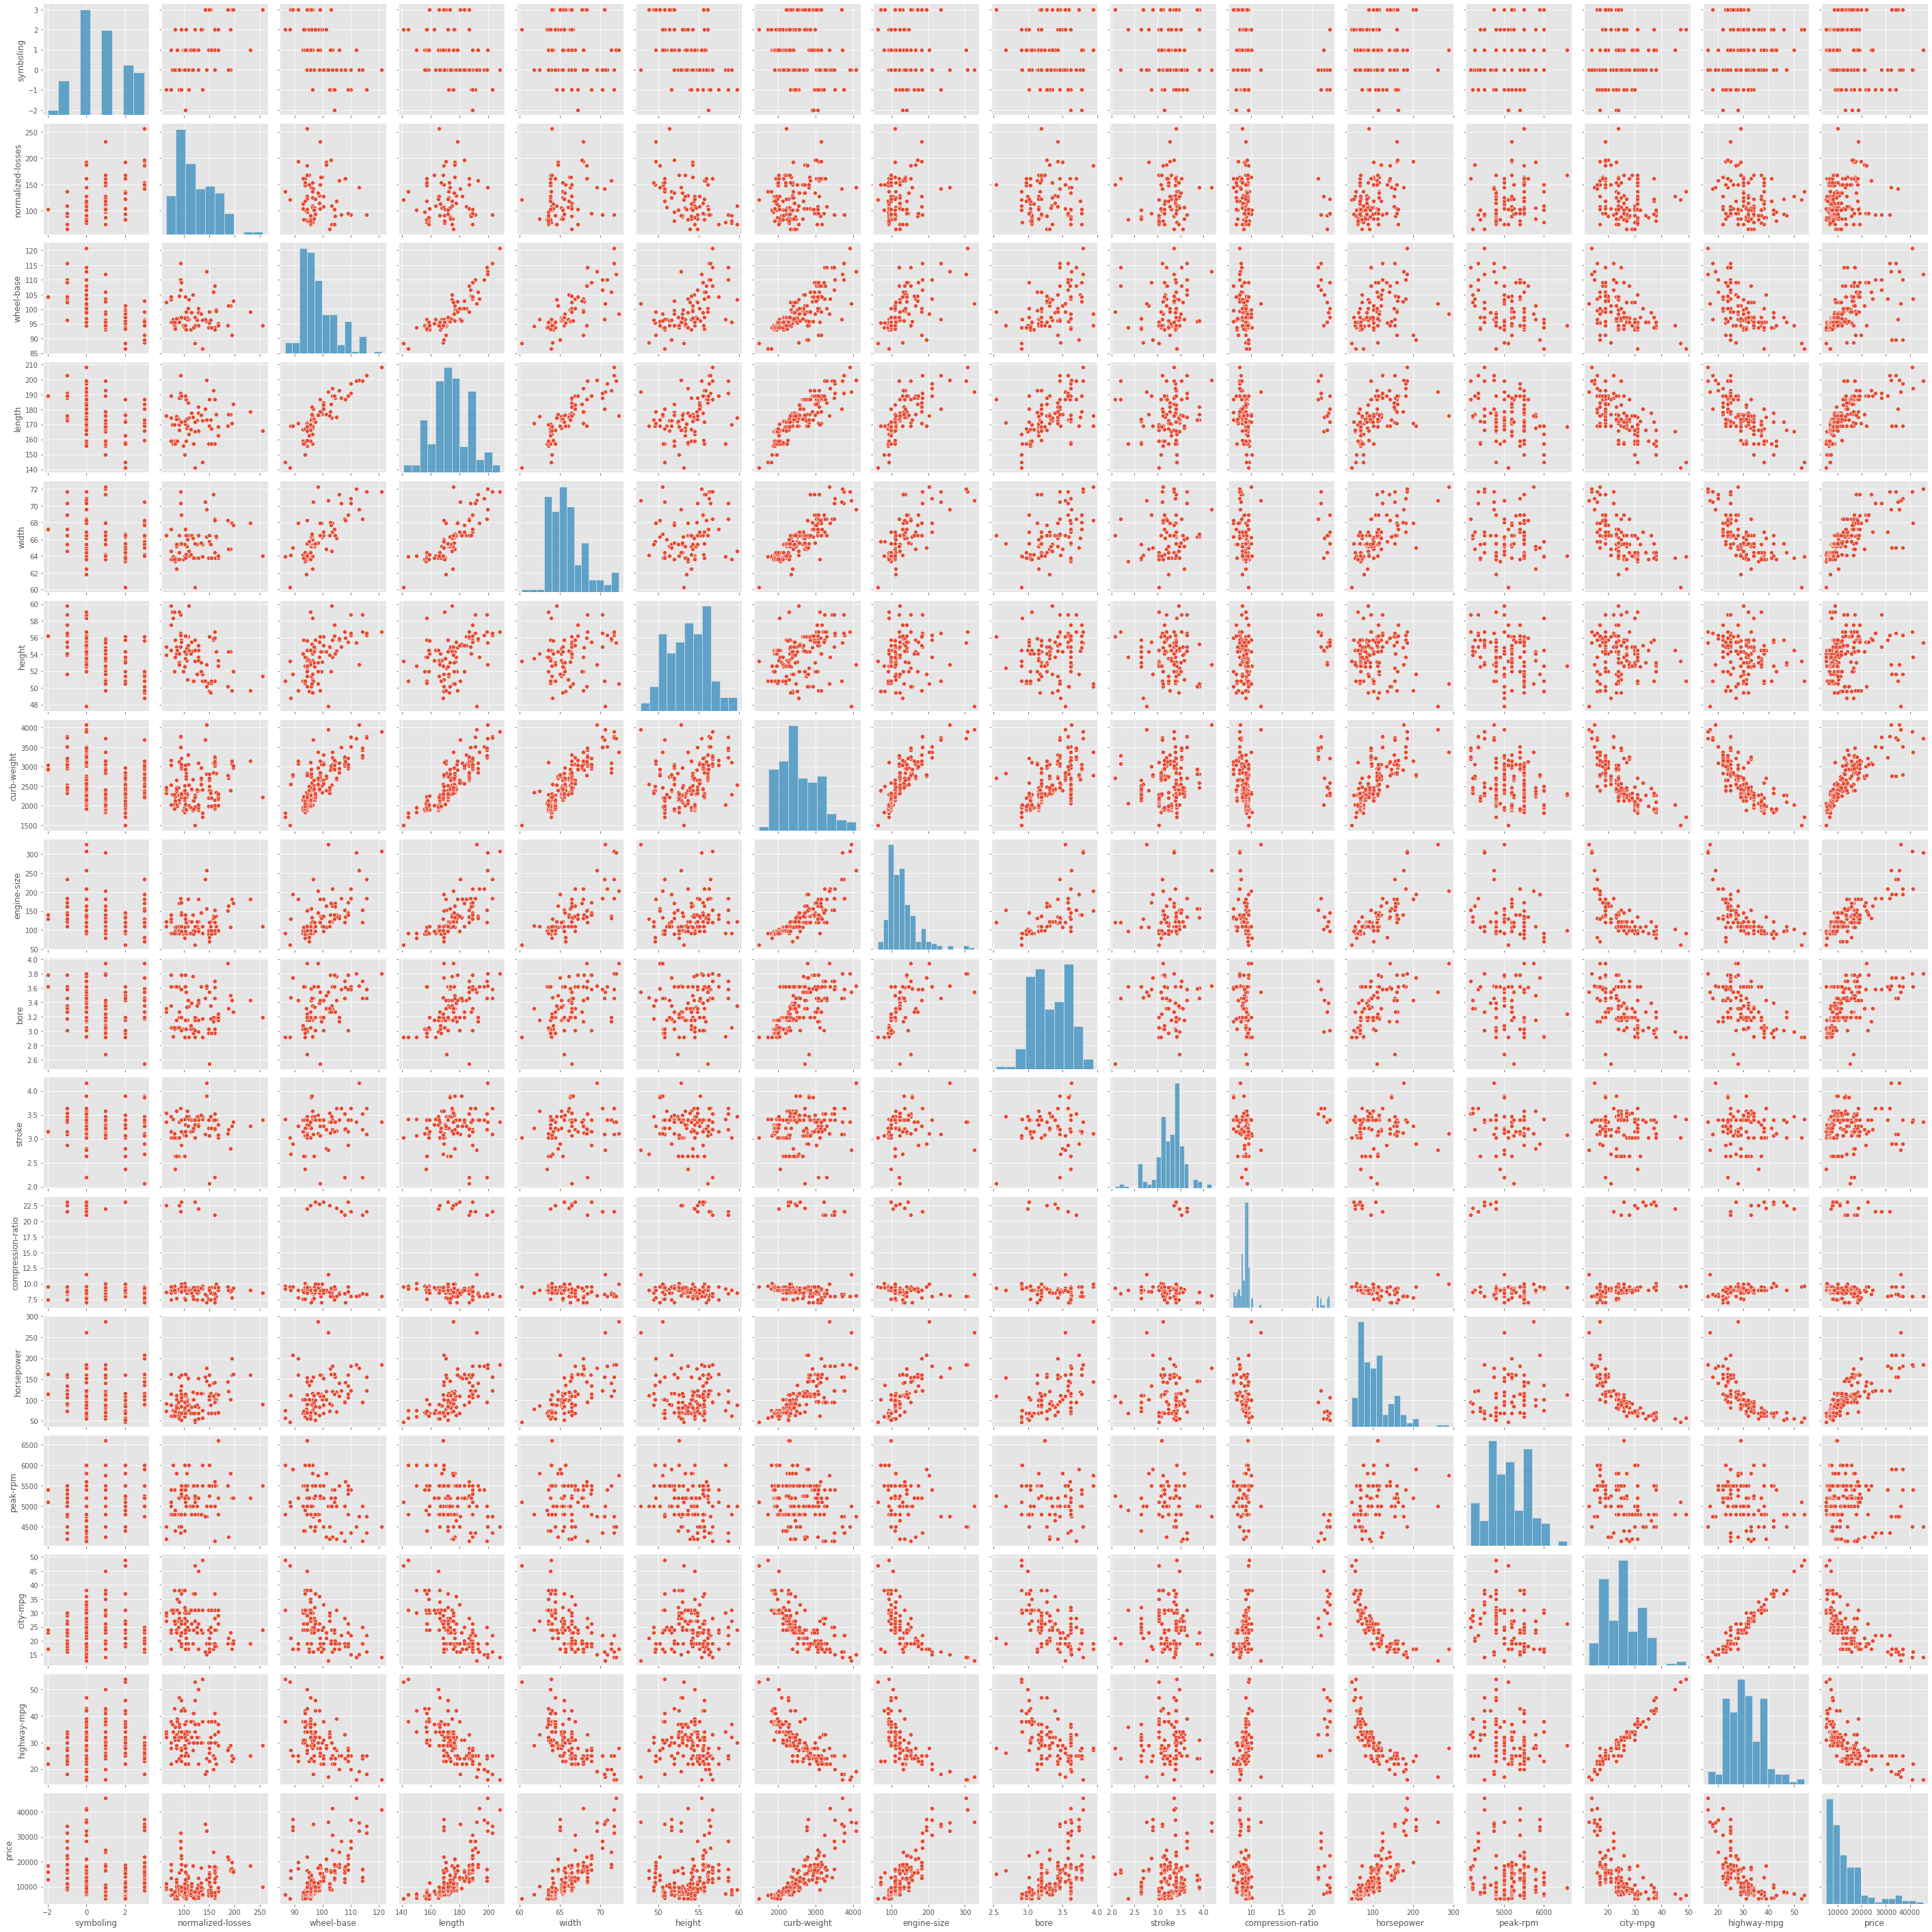

In [3]:
sns.pairplot(data);

In [4]:
data['num-of-doors'] = data['num-of-doors'].apply(lambda x: 4 if x == 'four' else 2)
data['num-of-cylinders'] = data['num-of-cylinders'].apply(lambda x: 4 if x == 'four' else x).apply(lambda x: 12 if x == 'twelve' else x).apply(
    lambda x: 2 if x == 'two' else x).apply(lambda x: 6 if x == 'six' else x).apply(
    lambda x: 5 if x == 'five' else x).apply(lambda x: 8 if x == 'eight' else x).apply(lambda x: 3 if x == 'three' else 0)

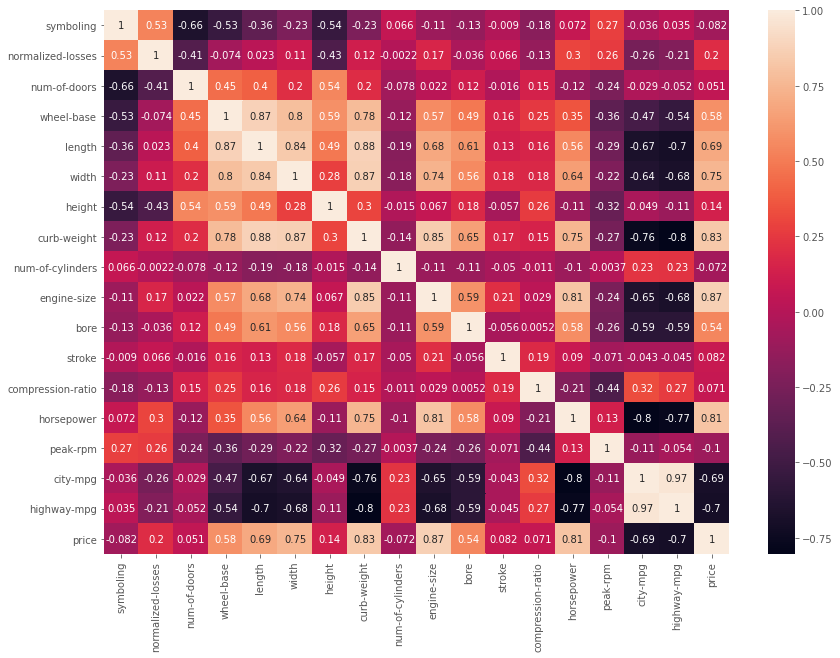

In [5]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True);

In [6]:
target = ['price']
numeric = ['wheel-base','length','height','curb-weight','normalized-losses',
           'engine-size','compression-ratio','city-mpg','highway-mpg',
          'bore','stroke','horsepower','peak-rpm','width','num-of-cylinders','num-of-doors']
categorical = [x for x in data.columns if x not in target+numeric]

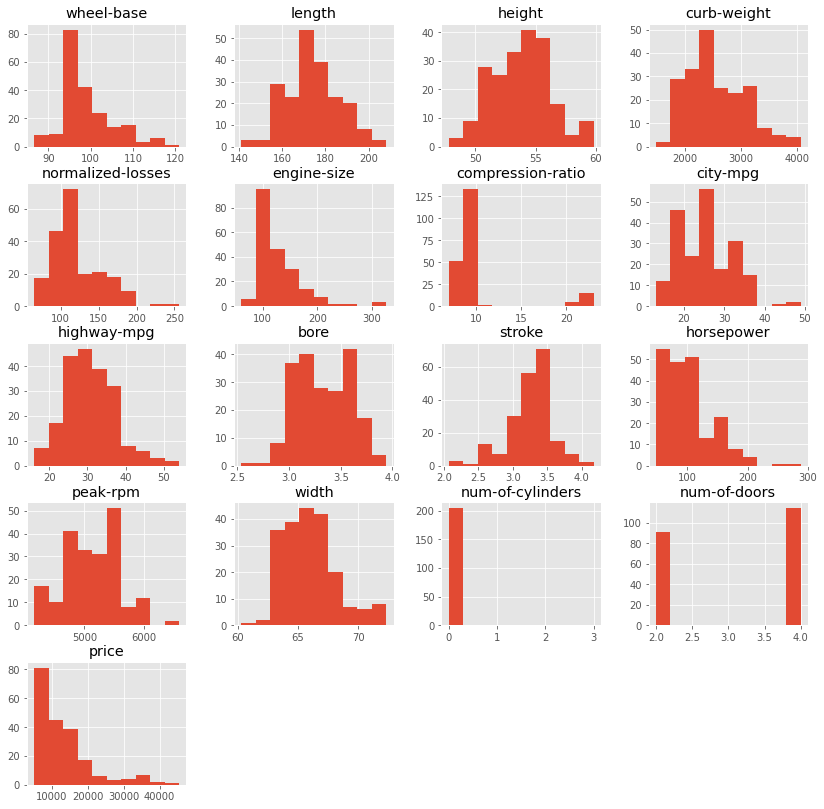

In [12]:
data[numeric+target].hist(figsize=(14,14));

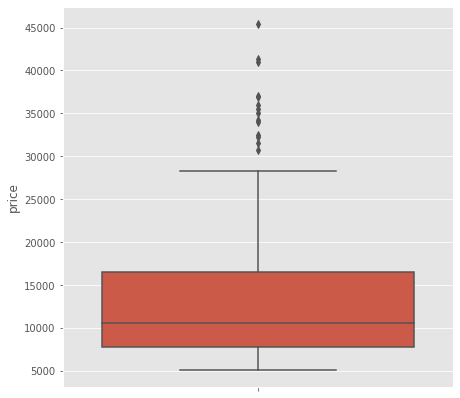

In [13]:
plt.figure(figsize=(7,7))
sns.boxplot(y=data['price']);

## Feature Engineering
-------------
### Missing Values

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

In [15]:
data['normalized-losses'].fillna(np.mean(data['normalized-losses']),inplace=True)
data['num-of-doors'].dropna(inplace=True)
data['bore'].fillna(np.mean(data['bore']),inplace=True)
data['stroke'].fillna(np.mean(data['stroke']),inplace=True)
data['horsepower'].fillna(np.mean(data['horsepower']),inplace=True)
data['peak-rpm'].fillna(np.mean(data['peak-rpm']),inplace=True)
data['price'].fillna(np.mean(data['price']),inplace=True);

### Scaling

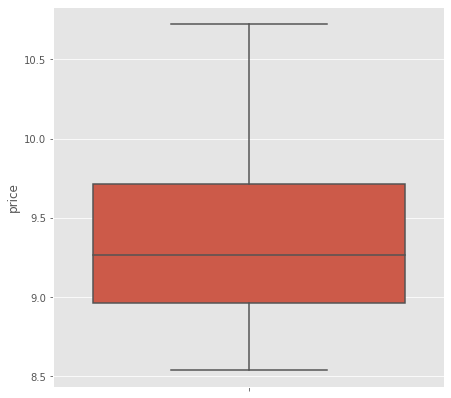

In [16]:
plt.figure(figsize=(7,7))
sns.boxplot(y=np.log(data['price']));

In [17]:
data['price'] = np.log(data['price'])

In [38]:
scaling = ['curb-weight','peak-rpm','length','normalized-losses','horsepower']

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
data_scaled = data
data_scaled[scaling] = scaler.fit_transform(data[scaling])

In [41]:
data_scaled[numeric]

,wheel-base,length,height,curb-weight,normalized-losses,engine-size,compression-ratio,city-mpg,highway-mpg,bore,stroke,horsepower,peak-rpm,width,num-of-cylinders,num-of-doors
0,88.6,0.413433,48.8,0.411171,0.298429,130,9.0,21,27,3.47,2.68,0.262500,0.346939,64.1,0,2
1,88.6,0.413433,48.8,0.411171,0.298429,130,9.0,21,27,3.47,2.68,0.262500,0.346939,64.1,0,2
2,94.5,0.449254,52.4,0.517843,0.298429,152,9.0,19,26,2.68,3.47,0.441667,0.346939,65.5,0,2
3,99.8,0.529851,54.3,0.329325,0.518325,109,10.0,24,30,3.19,3.40,0.225000,0.551020,66.2,0,4
4,99.4,0.529851,54.3,0.518231,0.518325,136,8.0,18,22,3.19,3.40,0.279167,0.551020,66.4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,0.711940,55.5,0.567882,0.157068,141,9.5,23,28,3.78,3.15,0.275000,0.510204,68.9,0,4
201,109.1,0.711940,55.5,0.605508,0.157068,141,8.7,19,25,3.78,3.15,0.466667,0.469388,68.8,0,4
202,109.1,0.711940,55.5,0.591156,0.157068,173,8.8,18,23,3.58,2.87,0.358333,0.551020,68.9,0,4
203,109.1,0.711940,55.5,0.670675,0.157068,145,23.0,26,27,3.01,3.40,0.241667,0.265306,68.9,0,4


### Encoding

In [42]:
data_scaled[categorical]

,symboling,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,fuel-system
0,3,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,3,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,1,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,2,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,2,audi,gas,std,sedan,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,sedan,rwd,front,ohc,mpfi
201,-1,volvo,gas,turbo,sedan,rwd,front,ohc,mpfi
202,-1,volvo,gas,std,sedan,rwd,front,ohcv,mpfi
203,-1,volvo,diesel,turbo,sedan,rwd,front,ohc,idi


In [43]:
for i in categorical:
    print(data_scaled[i].value_counts())

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
chevrolet         3
jaguar            3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64
gas       185
diesel     20
Name: fuel-type, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64
front    202
rear       3
Name: engine-location, dtype: int64
ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv    

In [44]:
data_scaled = pd.get_dummies(data_scaled,columns=categorical,drop_first=True)

### Feature Selection

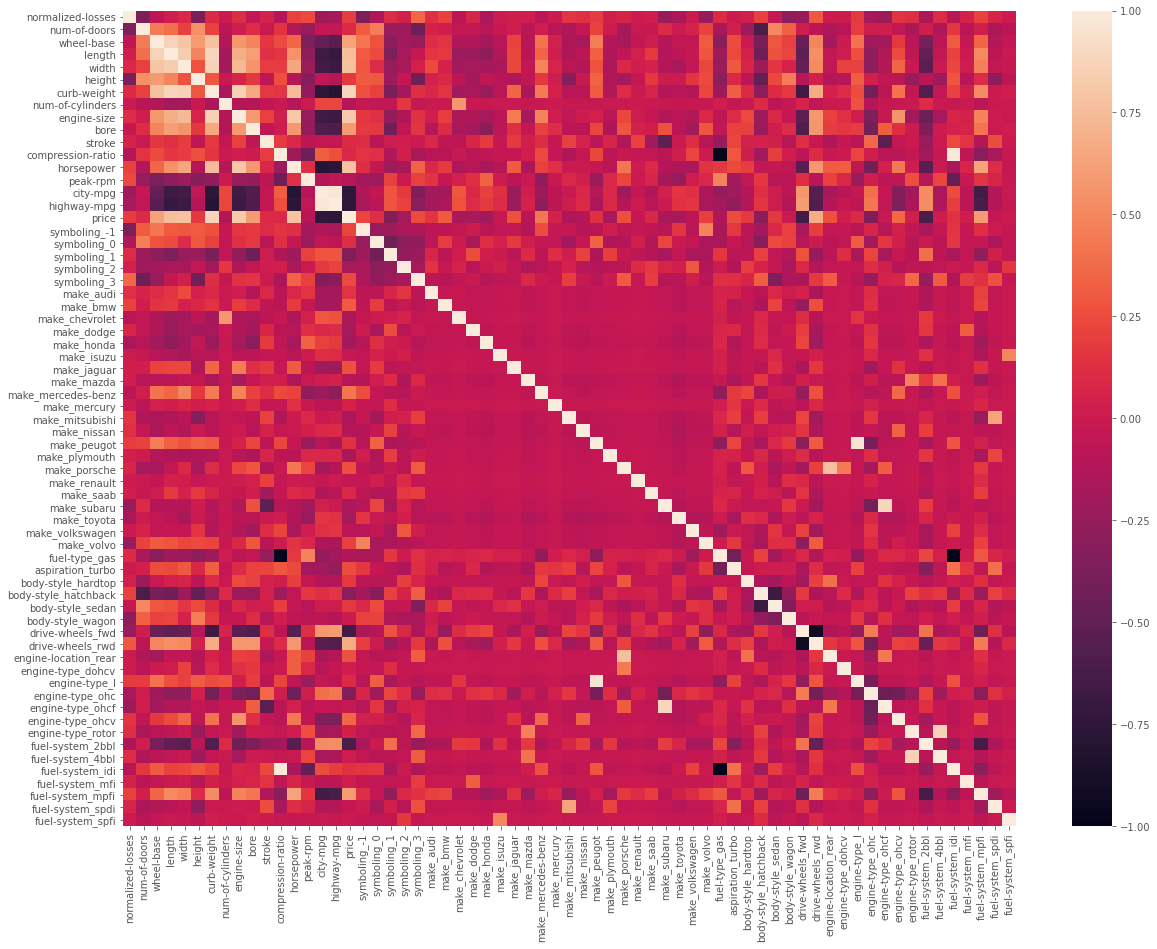

In [45]:
plt.figure(figsize=(20,15))
sns.heatmap(data_scaled.corr());

In [46]:
arr = data_scaled.corr()
for i in data_scaled.drop('price',axis=1).columns:
    for j in data_scaled.drop('price',axis=1).columns:
        if arr[i][j]>0.83 and i in data_scaled.columns and j in data_scaled.columns and i!=j:
            data_scaled.drop(i,axis=1,inplace=True)

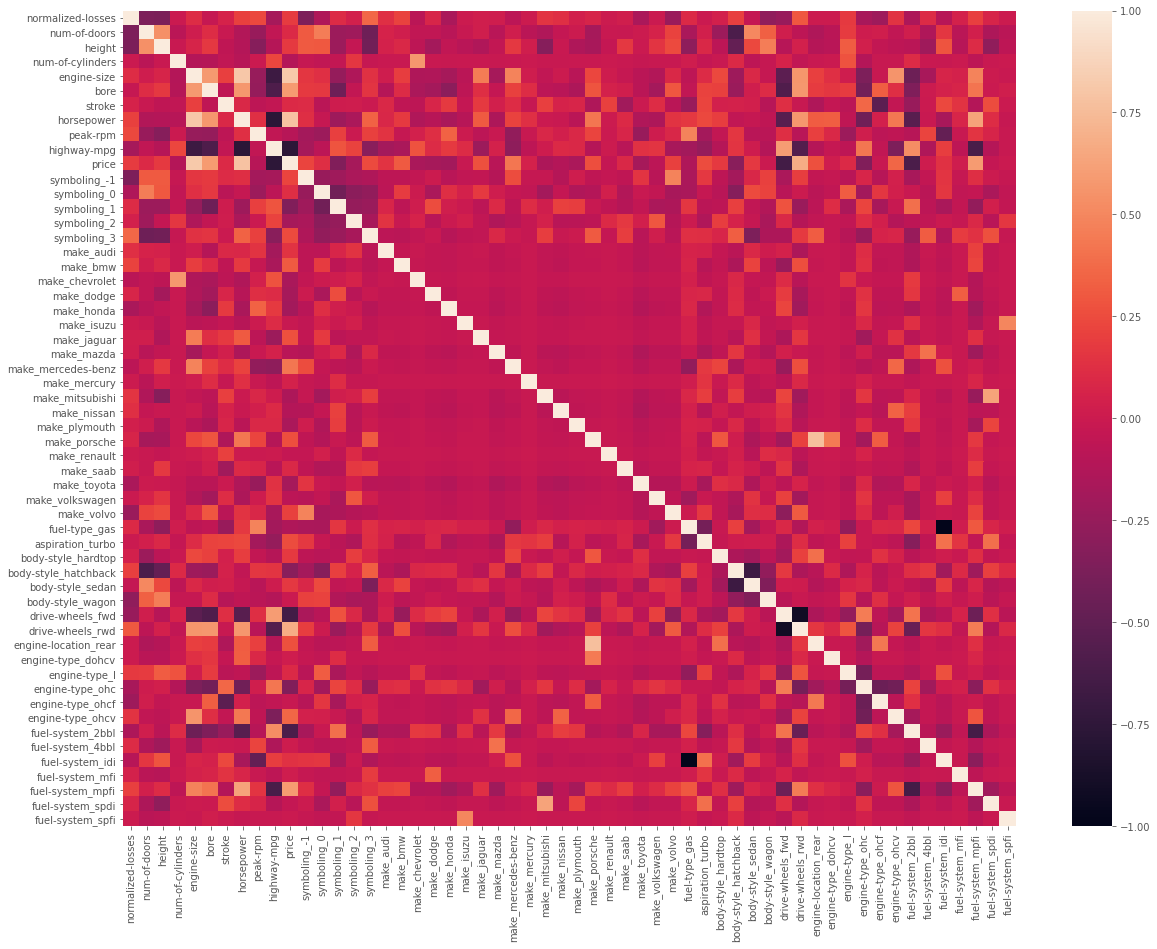

In [47]:
plt.figure(figsize=(20,15))
sns.heatmap(data_scaled.corr());

## Model Selection
--------------
### Metrics and train-test split

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
def accuracy_report(y_true,y_pred):
    print('RMSE: ' + str(math.sqrt(mean_squared_error(np.exp(y_true),np.exp(y_pred)))))
    print('MAE: ' + str(mean_absolute_error(np.exp(y_true),np.exp(y_pred))))
    print('R2: ' + str(r2_score(np.exp(y_true),np.exp(y_pred))))

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_scaled.drop('price',axis=1),data_scaled['price'],test_size=0.3, 
                                                random_state=42)

### Baseline

In [78]:
accuracy_report(y_test,np.ones(len(y_test))*np.mean(y_test))

RMSE: 8469.720930028074
MAE: 5454.335953294074
R2: -0.04517396894251169


### Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
accuracy_report(y_test,lr_model.predict(X_test))

RMSE: 2815.4258872095784
MAE: 1810.0341515944433
R2: 0.8845115422215197


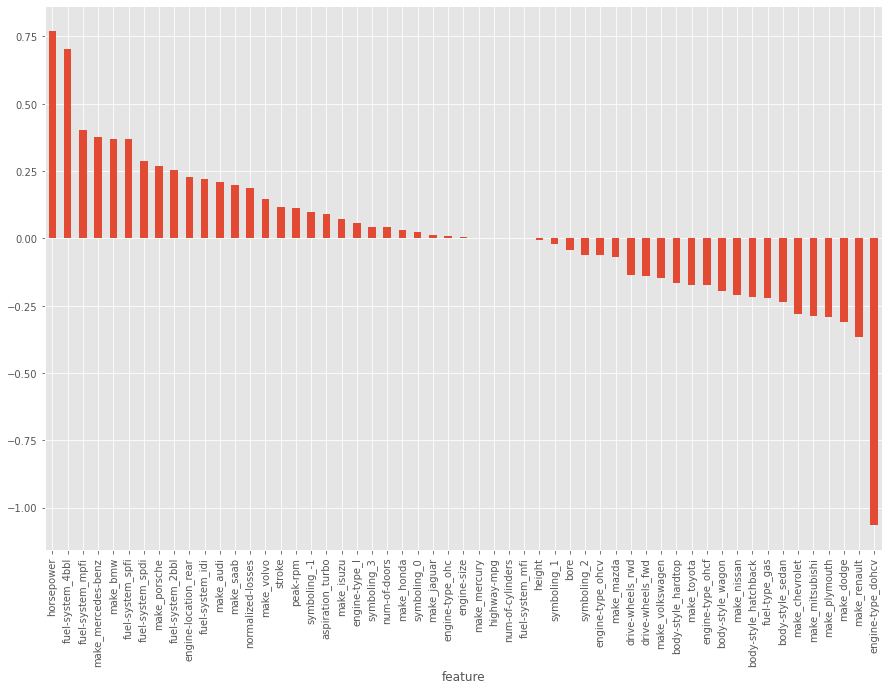

In [80]:
featureImportance = pd.DataFrame({'feature':list(data_scaled.drop('price', axis=1).columns),
                                 'coef': lr_model.coef_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['coef'],ascending=False, inplace=True)
featureImportance["coef"].plot(kind='bar', figsize=(15, 10));

## Linear Regrression with Lasso regularization and Cross-Validation

In [65]:
from sklearn.linear_model import LassoCV
ls_model = LassoCV(cv=4, random_state=1)
ls_model.fit(X_train,y_train)
accuracy_report(y_test,ls_model.predict(X_test))

RMSE: 4400.686529187258
MAE: 2550.2353960333953
R2: 0.7178427261731701


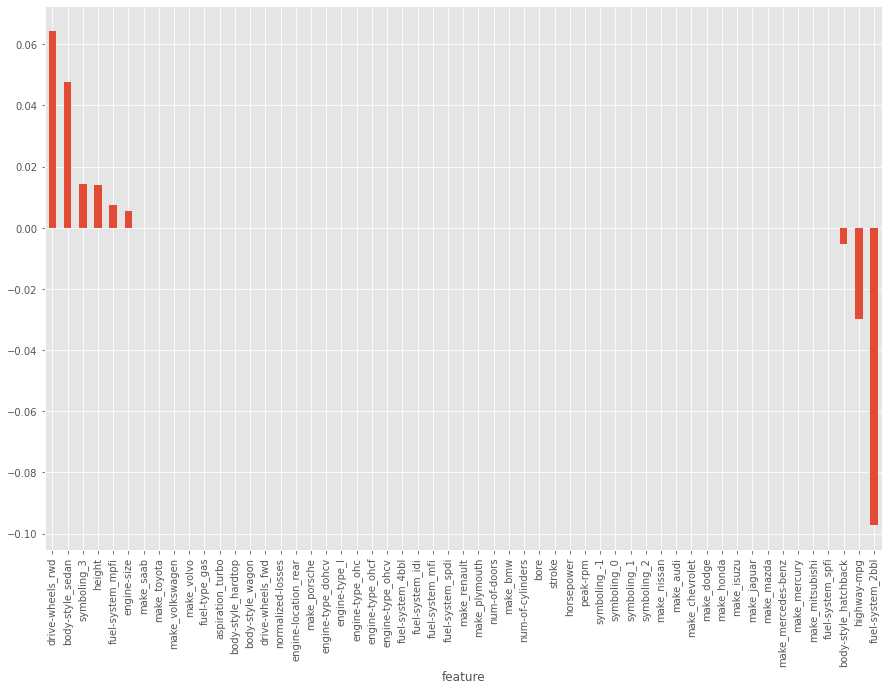

In [66]:
featureImportance = pd.DataFrame({'feature':list(data_scaled.drop('price', axis=1).columns),
                                 'coef': ls_model.coef_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['coef'],ascending=False, inplace=True)
featureImportance["coef"].plot(kind='bar', figsize=(15, 10));

## Linear Regrression with Ridge regularization and Cross-Validation

In [67]:
from sklearn.linear_model import RidgeCV
rd_model = RidgeCV(cv=5)
rd_model.fit(X_train,y_train)
accuracy_report(y_test,rd_model.predict(X_test))

RMSE: 2716.839082613526
MAE: 1621.653694658871
R2: 0.8924579737552029


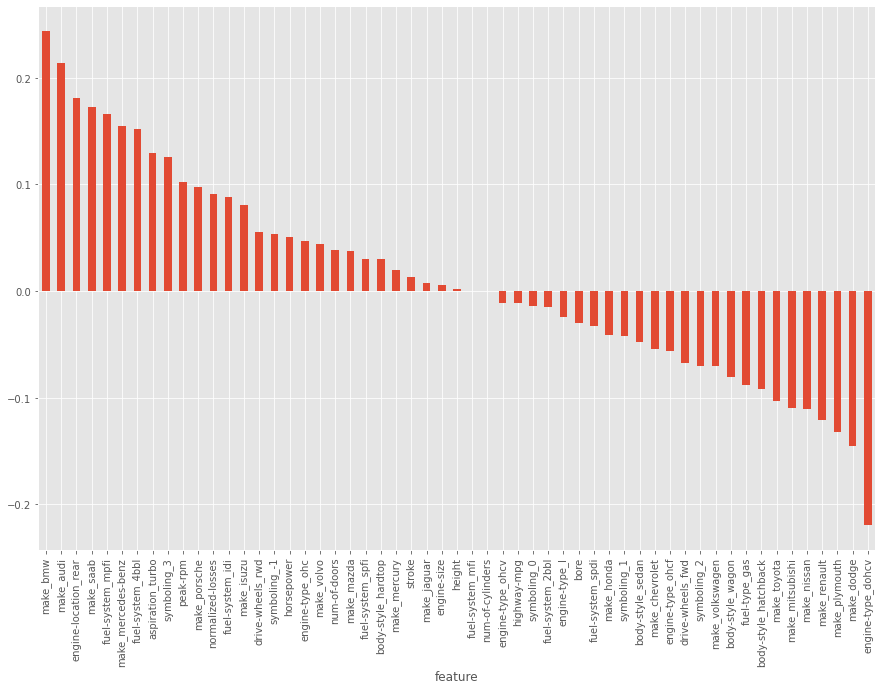

In [68]:
featureImportance = pd.DataFrame({'feature':list(data_scaled.drop('price', axis=1).columns),
                                 'coef': rd_model.coef_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['coef'],ascending=False, inplace=True)
featureImportance["coef"].plot(kind='bar', figsize=(15, 10));

## Linear Regrression with ElasticNet regularization and Cross-Validation

In [74]:
from sklearn.linear_model import ElasticNetCV
el_model = ElasticNetCV(cv=4,random_state=42)
el_model.fit(X_train,y_train)
accuracy_report(y_test,el_model.predict(X_test))

RMSE: 4425.0140460057755
MAE: 2573.3942374551198
R2: 0.7147145057033331


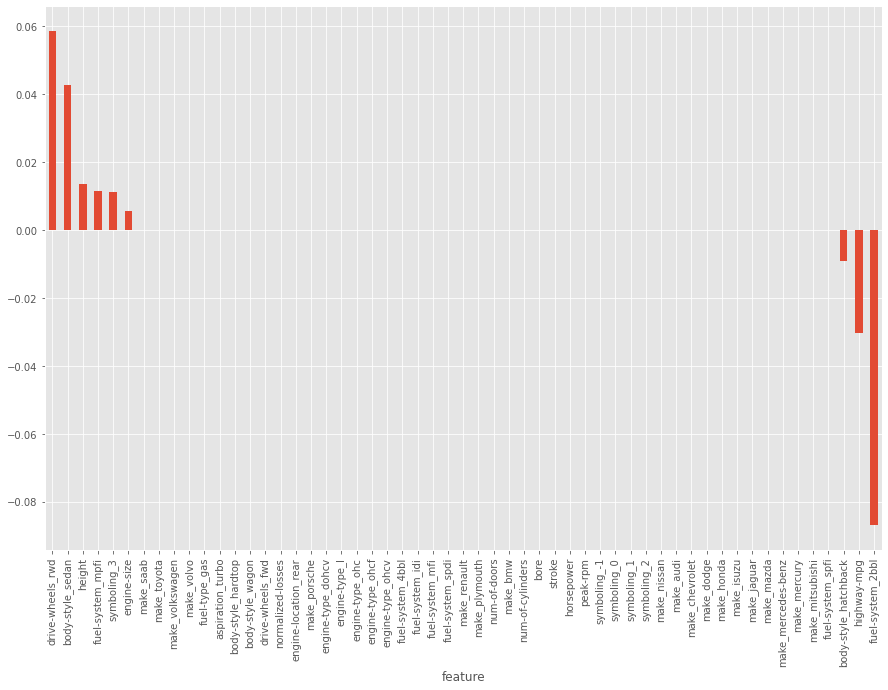

In [75]:
featureImportance = pd.DataFrame({'feature':list(data_scaled.drop('price', axis=1).columns),
                                 'coef': el_model.coef_})
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['coef'],ascending=False, inplace=True)
featureImportance["coef"].plot(kind='bar', figsize=(15, 10));